# 1. Data import 
 Import the required libraries and the manuscript information to be processed. 
The data comes from the editorial system used at work and can be directly exported as an Excel file.


In [101]:
import pandas as pd
import jieba
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

file_path = "/Users/snowliu/Downloads/20250307170539.xls"

# Read Excel
df = pd.read_excel(file_path, sheet_name="稿件信息",header = 1)


# 2. Data processing

In [102]:
# 2. Processing Chinese word segmentation
def process_text(text):
    # Custom stopword list: Since many meaningless words exist in these titles, they need to be removed in order to retain only the key terms.
    stopwords = set(['的', '与', '及', '在', '基于', '下', '中', '例', '以', '为例', '——', '实践', '研究', '教学', '设计', '策略', '探究','创设','英语','高中英语','浅析','课为例','促进','相结合','学生','学习','培养','运用','探索','及其','尝试','如何','提升','整合','提高','初中','初中生','一节','分析','有效','多轮','教育','依托','通过','小学','初中英语','高中生','开展','指向','高中','结合','中学英语','问题','为例','例谈','译林','融合','阅读教学','中小'])
    
    # Use Jieba for word segmentation
    words = jieba.lcut(str(text))
    
    # Filter out stopwords and non-Chinese characters
    filtered = [
        word for word in words 
        if len(word) > 1 and 
           '\u4e00' <= word[0] <= '\u9fff' and 
           word not in stopwords
    ]
    return ' '.join(filtered)

# 3. Corpus Generating
Generate a corpus from the title keywords after word segmentation and filtering.

In [103]:
# Generate corpus
all_titles = ' '.join(df['标题'].dropna())
processed_text = process_text(all_titles)


Print the filtered keywords.

In [104]:
print(processed_text)

单元 导读 课堂 反思 科普 故事 路径 实施 骨架 文本 思维 训练 铺展 板块 后续 身临其境 乐在其中 语篇 意识 创编 对话 能力 衔接 自然 拼读 国际音标 语音 教学策略 初探 解码 绘本 批注 阅读 素养 单元 活动 标题 一体化 戏剧 仲夏夜 之梦 逆向 单元 写作 教版 八年级 下册 逆向 理念 指导 对话 英国 民族 身份 社会 文化 视阙 维多利亚 淑女 典范 模型 教材 项目 人教版 选修 板块 改变 教师 话语 课堂 参与度 行动 修改 三新 背景 中小学 教师 文学 素养 路径 英语教材 对话 部分 词块 结构化 知识 作为 主线 单元 整体 路径 以外 研版 初二 设计说明 构建 任务 目标 合理 定位 例析 文学 课外阅读 文本 解读 以写 促读 理念 报刊 批注 阅读 范文 写作 意义 应用 语料库 技术 读写能力 多维 阅读 故事 失踪 着眼 整体 优化 听前 活动 北师大 听说 目标 设定 单元 整体 作业 进阶 阅读 写作 协同 发展 群文 读写 课堂 绘本 读写 双向 融通 教学策略 小初 衔接 现状 思考 以同 异构 阅读 拓展 产出 导向 视域 读写 对策 基本 私下 对话 应对 方式 对话 口译 译员 角色 表现 眼神 互动 转换 两项 指标 案例 精设 构建 高效 课堂 牛津 上海 故事 板块 双重 角色 阅读 模式 故事 创新 应用 八年级 典范 故事 阅读课 根据 新闻 语篇 特点 指导 新闻 听说 循环式 课堂 活动 社会主义 核心 价值观 写作 命题 渗透 过程 取向 听力 公开课 片段 评析 思考 深层 文本 解读 中学生 思维能力 研版 标准 五年级 上册 例议 课堂教学 思维 灵活性 写作 教学策略 校际 协作 教研 模式 欧洲 我国 外语 改革 正式 聚焦 主题 语境 阅读 教学模式 巧借 语法 课堂 助推 思维 发展 阅读 课堂 积极 反馈 认知 支架 功能 特征 视听 课中 批判性 思维 题为 八年级 视听 围绕 话题 情境 激发 思维 过程 写作 高阶 思维 阅读课 读后 活动 主题 意义 复述 写作水平 小学生 创新 精神 绘本 阅读 思考 语篇 组织 模式 说明文 文本 解构 多元 支架 诗歌 实效 从白 牡丹亭 英译本 中国 古典 戏剧 英译 表演性 核心 素养 说明文 背诵 一体化 师生

# 4. Word frequency counting

In [105]:
# Count the keyword frequency
word_counts = Counter(processed_text.split())

# 5. Wordcloud Generating
Custom the wordcloud picture.

In [106]:
# Generate wordcloud
wc = WordCloud(
    font_path="/System/Library/Fonts/Supplemental/Songti.ttc",  
    background_color='white',  # background color
    max_words=150,            # The maximum number of words displayed
    width=1200, height=800,    # The size of picture
    colormap='viridis'         # color matching
)

wordcloud = wc.generate_from_frequencies(word_counts)

# 6. Visualisation
Use matlotlib generate a picture.

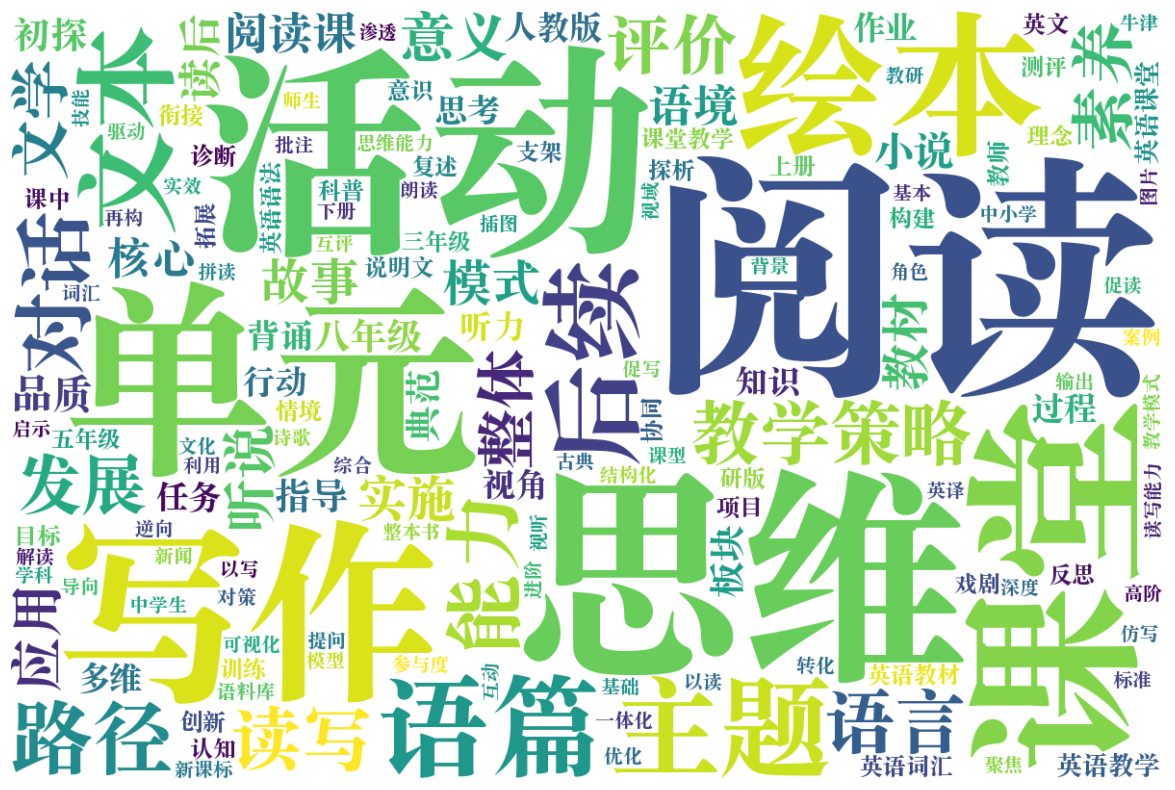

In [107]:
# Visualise the wordcloud and import the picture.
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('english_learning_wordcloud.png')

# 7. Analysis
The word cloud generated from manuscript titles in English Language Learning highlights a clear thematic concentration on reading, thinking, writing, and classroom activity design. The most prominent term is 阅读 (reading), indicating that reading instruction is a central concern of the journal. This focus is further supported by related terms such as 语篇 (text), 读写 (reading-writing), and 读后写 (post-reading writing), suggesting an integrated approach to reading and writing in the language learning process.

思维 (thinking) appears frequently, reflecting an emphasis on the cultivation of critical and reflective thinking skills. This focus aligns with broader educational goals that aim to develop students’ cognitive abilities and strategic learning approaches. Terms like 策略 (strategy), 路径 (pathway), and 反思 (reflection) further indicate an interest in thinking-driven teaching models and learning processes.

写作 (writing) is another dominant theme, pointing to the importance of writing pedagogy and its integration with reading activities. The recurrence of terms such as 任务 (task), 输出 (output), and 作文 (composition) suggests a task-based orientation that emphasizes writing as both a learning objective and a method for language output.

Classroom practice is a significant dimension of the submitted manuscripts, as seen in keywords like 课堂 (classroom), 活动 (activity), 实施 (implementation), and 教学策略 (teaching strategies). These terms imply a strong emphasis on practical teaching, lesson design, and classroom engagement. Additional words such as 单元 (unit), 项目 (project), and 模式 (model) point to structural considerations in curriculum design and innovative instructional formats.

Overall, the thematic focus of the journal’s manuscripts reflects a strong commitment to reading-centered instruction, the integration of thinking and writing, and the development of effective and engaging classroom practices.

# 8. Conclusion

This project focuses on analyzing the thematic trends of manuscripts published in the journal *English Language Learning* by applying natural language processing (NLP) techniques using Python. The manuscript titles, exported in Excel format from the editorial system, were first imported and processed using the `pandas` library. Chinese word segmentation was performed with the `jieba` package, and a custom stopword list was applied to remove common but semantically insignificant words, as well as non-Chinese characters, thereby enhancing the focus and clarity of the extracted keywords.

Following text processing, word frequency statistics were calculated using the `Counter` module. The `wordcloud` and `matplotlib` libraries were then used to visualize the results in the form of a word cloud. The visualization clearly highlights frequently occurring terms such as “阅读” (reading), “思维” (thinking), “写作” (writing), “课堂” (classroom), “活动” (activity), and “语篇” (text/discourse), indicating that current research in the journal places a strong emphasis on reading instruction, cognitive development, writing pedagogy, and classroom-based practices. These findings not only reflect ongoing trends in language education research but also provide data-driven insights into the journal's topical orientation.

This project demonstrates the effective application of natural language processing in the analysis of educational text data. It offers an end-to-end pipeline from data import and preprocessing to statistical analysis and visualization. The method presented is scalable and adaptable, with the potential to be applied in other contexts such as tracking topic evolution, identifying research hotspots, and optimizing editorial strategies in academic publishing. As such, it contributes to the broader goal of promoting digital and intelligent approaches in education research.